In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. The neural membrane

A minimalistic biophysical model of a neuron takes into account the following facts:
- Charge can collect on the cell membrane (modeled by a capacitor)
- The membrane is permeable for ions (modeled by a resistor)
- There is a voltage gradient across the membrane (modeled by a battery)

These components can be put together by placing the capacitor in parallel with the resistor and battery. The result is an equivalent circuit model of the neural membrane. The battery makes this model a straightforward extension from the basic RC circuit model. Its behavior is described by the following differential equation:

$$
\tau\dfrac{dv}{dt} = -(V-V_{rest}) + RI
$$

With $\tau = RC$. For the simulations that follow we will use the following values for the parameters. Note that the choice for the scale of the units has as a result that the unit of time is in milliseconds. Units always confuse me so as a quick check I replace the names with their actual values. For example, if resistance is expressed in Mega units and capacitance in nano units, this is equivalent to:

$$
40 M\Omega * 1 nF = 40 * 10^6 * 1 * 10^{-9} = 40 * 10^{-3} = 40 ms
$$


In [ ]:
# Parameters for the passive membrane model
R      = 40   # [Mohm]
C      = 1.0  # [nF]
tau    = R*C  # Membrane time constant [ms]
V_rest = 0.0  # Equilibrium potential  [mV]
dt     = 1.0  # Simulation time step [ms]

max_t  = 500  # Total simulation time [ms]
t = np.arange(0,max_t,dt)

With these parameters we will calculate the results for the following step-current scenario:

- First 500 ms without input current
- 500 ms with an input current
- Final 500 ms without input current

## 2. Analytical solution

The analytical solution to the differential equation is:

$$
V(t) = (RI + V_{rest})(1 - e^{-t/\tau}) + V_{init}e^{-t/\tau}
$$

The right hand side shows that the contribution of the initial value of the membrane potential decays to zero. From the differential equation we can derive the steady state solution by setting the derivative equal to zero. This results in the value $RI + V_{rest}$, which is also the limiting value for $V(t)$ as $t$ continues towards infinity. 

For a step current scenario it is easiest to perform the calculation separately for the three parts, where in each part we use the final voltage value that was calculated in the previous part.

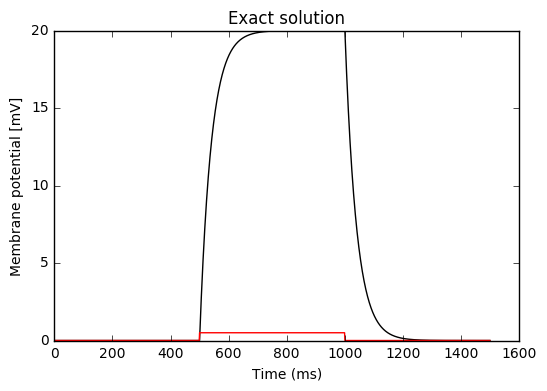

In [3]:
# The analytical solution calculated for three different intervals
I_ext = 0.0
V_init = 0.0
V_1 = (V_rest + R*I_ext)*(1-np.exp(-t/tau)) + V_init*np.exp(-t/tau)

I_ext = 0.5
V_init = V_1[-1]
V_2 = (V_rest + R*I_ext)*(1-np.exp(-t/tau)) + V_init*np.exp(-t/tau)

I_ext = 0.0
V_init = V_2[-1]
V_3 = (V_rest + R*I_ext)*(1-np.exp(-t/tau)) + V_init*np.exp(-t/tau)

V_exact = np.concatenate((V_1,V_2,V_3))
I = np.concatenate((np.zeros(len(t)),0.5*np.ones(len(t)),np.zeros(len(t))))

plt.plot(V_exact,'k')
plt.plot(I,'r')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential [mV]')
plt.title('Exact solution')

The red line shows how at t = 500 ms an input current is turned of. In response to this current step the membrane potential starts to increase with a certain rate towards the steady state solution. When the input current is turned off the membrane discharges again.

## 3. Numerical solution

In most scenarios it will not be possible to work with an exact solution. In that we can use the Euler method as an approximation to the exact solution:

$$
v(t + dt) = v(t) + dVdt
$$

$$
dv = \frac{-(V(t)-V_{rest}) + RI}{\tau}
$$

For this to work we only need to know the current that will be applied at each point in time and a starting value for the membrane potential. This approach is more flexible because it does not depend on the specific current values that have been used. We could simply replace the current vector with any arbitrary vector and still calculate an approximate solution. This would be more difficult with the analytical solution where closed form solutions only exist for currents that are 'well-defined'.

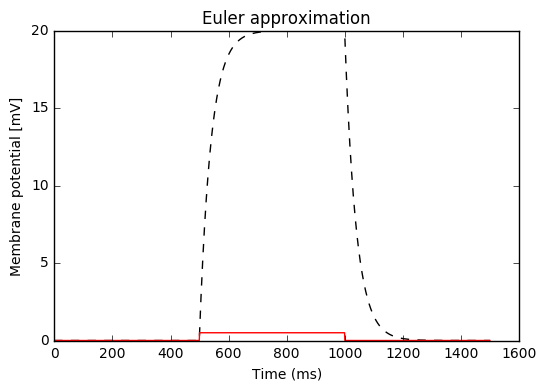

In [4]:
# Euler solution
V_euler = np.zeros(len(I))
for i in range(1,len(I)):
    dV = (-(V_euler[i-1] - V_rest) + R*I[i])/tau
    V_euler[i] = V_euler[i-1] + dV*dt
    
plt.plot(V_euler,'--k')
plt.plot(I,'r')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential [mV]')
plt.title('Euler approximation')